# This is from -> https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# w/o skip row, it will show the incorrect row
# data = pd.read_csv("data/Marketing_Analysis.csv")

#read dataset, skip first 2 row ..
data = pd.read_csv("data/Marketing_Analysis.csv", skiprows=2)


#print data head (just the top) if just "data" it will print everything
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [2]:
#drop customer id
data.drop('customerid', axis = 1, inplace=True)

#extract job and education
data['job']=data['jobedu'].apply(lambda x:x.split(",")[0])
data['education']=data['jobedu'].apply(lambda x:x.split(",")[1])

# drop the jobedu
data.drop('jobedu', axis=1,inplace=True)
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [3]:
# sum all null column
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [28]:
# # drop record with age missing in dataframe, ~ means not https://stackoverflow.com/questions/46054318/tilde-sign-in-pandas-dataframe
data = data[~data.age.isnull()].copy()
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [32]:
month_mode = data.month.mode()[0]

print(month_mode)

data.month.fillna(month_mode,inplace=True)

data.month.isnull().sum()

may, 2017


0

In [51]:
data = data[~data.response.isnull()].copy()

data.isnull().sum()


age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64


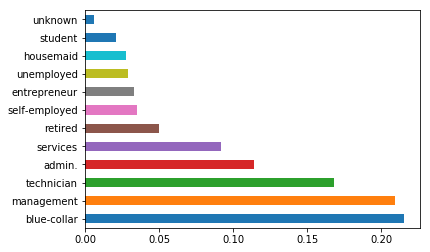

In [55]:
#calculate percentage of each job status category
print(data.job.value_counts(normalize=True))

#plot bar graph of percentage job categories
data.job.value_counts(normalize=True).plot.barh()
plt.show()


secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64


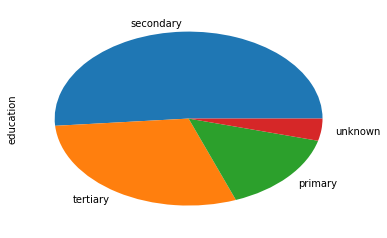

In [59]:
#calculate percewntage of each education category
print(data.education.value_counts(normalize=True))

#plot pie chart of education categoies
data.education.value_counts(normalize=True).plot.pie()
plt.show()


In [60]:
# This is how we analyze univariate categorical analysis. If the column or variable is of numerical then 
# we’ll analyze by calculating its mean, median, std, etc. We can get those values by using the describe function.
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

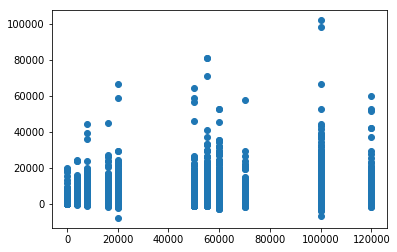

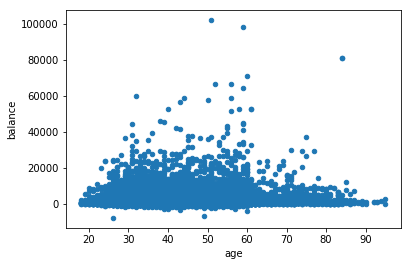

In [64]:
#plot scatter of balance vs salary variable in data
plt.scatter(data.salary, data.balance)
plt.show()

#plt scatter of balance n age in data
data.plot.scatter(x="age",y="balance")
plt.show()

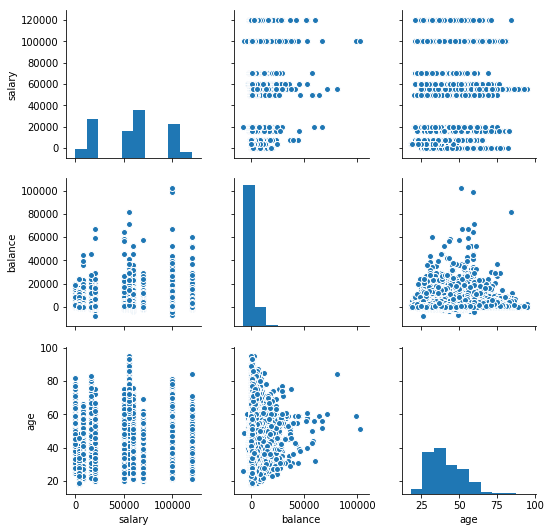

In [65]:
# plot pair plot of salary, balamce, age in data df
sns.pairplot(data=data, vars=['salary','balance','age'])

plt.show()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


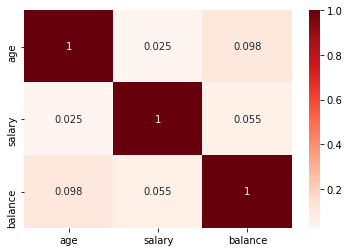

In [69]:
# create a matrix cause 3 variable easier to see
#create matrix using age,salary, balance as row n columns
display(data[['age','salary','balance']].corr())

#plot corr matrix of salaary balance n age in data df
sns.heatmap(data[['age','salary','balance']].corr(), annot=True,cmap="Reds")
plt.show()


In [70]:
#groupby the response to find the mean of salary with response yes n no separately

data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [71]:
#group by median
data.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


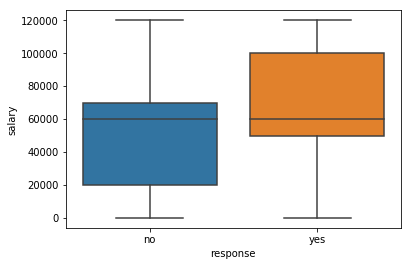

In [72]:
#plot box plot of salary for yes n no response
sns.boxplot(data.response, data.salary)
plt.show()

In [73]:
# create response rate of numerical data type where response yes = 1, no = 0. this is so that we can use a number cal
data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

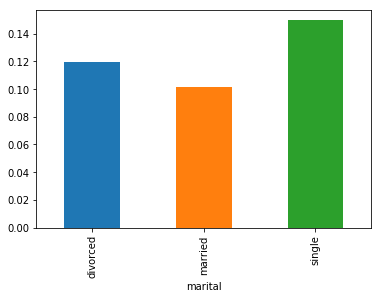

In [76]:
# plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


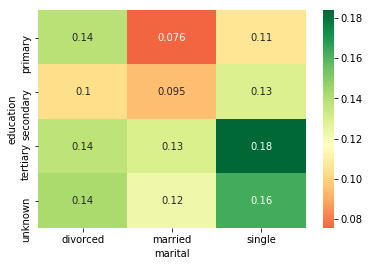

In [79]:
result = pd.pivot_table(data=data, index='education',columns='marital',values='response_rate')
print(result)

#make heat map based on it
sns.heatmap(result,annot=True,cmap='RdYlGn',center=0.117)
plt.show()